In [1]:
import cv2
import numpy as np
import os
import tensorflow as tf
import keras
from keras.models import load_model
from mtcnn.mtcnn import MTCNN
import face_recognition
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
i=0
lst=[]
for filename in os.listdir('banglore_pics'):
    img = cv2.imread('banglore_pics/'+filename)
    img_rgb  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    res = detector.detect_faces(img_rgb)
   
    for r in res:
        x1,y1,w,h = r['box']
        x1,y1 = abs(x1),abs(y1)
        x2,y2 = x1+w , y1+h
        face = img_rgb[y1:y2,x1:x2]
        face = cv2.resize(face,(160,160))
        cv2.imwrite('faces/face.{}.jpg'.format(i),face)
        lst.append(face)
        i+=1

In [2]:
from keras_facenet import FaceNet
embedder = FaceNet()


In [4]:
embeddings = embedder.embeddings(lst)
embeddings

array([[ 0.02781449, -0.02163147, -0.01129665, ..., -0.07539167,
        -0.06238589,  0.07345723],
       [ 0.00527814,  0.00733813, -0.01190926, ...,  0.04691559,
        -0.06791274,  0.02664462],
       [ 0.04422791,  0.05155814,  0.08366012, ..., -0.01768499,
         0.00608928,  0.05273225],
       ...,
       [ 0.01068151, -0.0683954 , -0.09482685, ...,  0.00680616,
        -0.00741699,  0.05418169],
       [-0.01863629, -0.05771938, -0.05429225, ...,  0.0172877 ,
        -0.0338712 ,  0.04896189],
       [ 0.02434989,  0.02515984,  0.05520168, ..., -0.02052499,
         0.04048404,  0.05799081]], dtype=float32)

In [5]:
clt = DBSCAN()
clt.fit(embeddings)

DBSCAN()

In [6]:
arr = clt.labels_
arr

array([ 3, -1,  0, -1, -1, -1, -1,  1,  2, -1, -1,  0,  5, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  0, -1, -1,  0,  0,  1,  3, -1,  4, -1,  5,
       -1,  8,  5, -1,  3, -1,  0, -1,  3,  0, -1, -1,  4, -1,  1,  5, -1,
       -1, -1,  0,  4,  7,  6,  3,  0, -1,  1, -1, -1, -1, -1,  1,  2,  0,
       -1,  5, -1, -1, -1, -1, -1,  0, -1,  6,  5, -1, -1,  0,  3,  0, -1,
        1,  0, -1,  0, -1, -1,  2, -1,  1, -1, -1,  2,  1, -1,  4,  0, -1,
        1, -1,  5,  0, -1,  3,  4,  8, -1, -1,  0, -1, -1,  0, -1,  3,  5,
       -1, -1,  0,  4,  5,  1, -1,  2, -1, -1,  5,  0,  3, -1,  0, -1, -1,
       -1, -1,  6,  7,  1, -1,  3, -1,  0, -1, -1, -1,  1,  0,  7,  0,  1,
        0, -1, -1, -1,  3, -1,  5, -1,  8, -1, -1, -1, -1, -1, -1,  0,  1,
        3,  4,  5, -1, -1, -1, -1, -1,  0, -1, -1, -1,  2,  1, -1,  5, -1,
       -1,  2,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  6,
        0,  7,  1, -1, -1,  5, -1,  1, -1,  3, -1, -1,  4,  0,  5,  8,  1,
        3,  0, -1,  2,  0

In [7]:
lab1=[]
lab2=[]
lab3=[]
lab4=[]
lab5=[]
lab6=[]
lab7=[]
lab8=[]
lab9=[]
lab10=[]
for c in range(len(arr)):
    if arr[c] == 3:
        lab1.append(c)
    if arr[c] == 0:
        lab2.append(c)
    if arr[c] == 1:
        lab3.append(c)
    if arr[c] == 2:
        lab4.append(c)
    if arr[c] == 4:
        lab5.append(c)
    if arr[c] == 5:
        lab6.append(c)
    if arr[c] == 6:
        lab7.append(c)
    if arr[c] == 7:
        lab8.append(c)
    if arr[c] == 8:
        lab9.append(c)
    if arr[c] == -1:
        lab10.append(c)

In [8]:
lab9

[35, 109, 161, 219, 265]

In [9]:
for i in lab1:
    
    for file in os.listdir('faces'):
        if int(file.split('.')[1]) ==i:
            os.rename('faces/'+file,'label1/'+file)
            
for j in lab2:
    
    for file in os.listdir('faces'):
        if int(file.split('.')[1]) ==j:
            os.rename('faces/'+file,'label2/'+file)

for j in lab3:
    
    for file in os.listdir('faces'):
        if int(file.split('.')[1]) ==j:
            os.rename('faces/'+file,'label3/'+file)
            
for j in lab4:
    
    for file in os.listdir('faces'):
        if int(file.split('.')[1]) ==j:
            os.rename('faces/'+file,'label4/'+file)
            
for j in lab5:
    
    for file in os.listdir('faces'):
        if int(file.split('.')[1]) ==j:
            os.rename('faces/'+file,'label5/'+file)
    
for j in lab6:
    
    for file in os.listdir('faces'):
        if int(file.split('.')[1]) ==j:
            os.rename('faces/'+file,'label6/'+file)

for j in lab7:
    
    for file in os.listdir('faces'):
        if int(file.split('.')[1]) ==j:
            os.rename('faces/'+file,'label7/'+file)
            
for j in lab8:
    
    for file in os.listdir('faces'):
        if int(file.split('.')[1]) ==j:
            os.rename('faces/'+file,'label8/'+file)
            
for j in lab9:
    
    for file in os.listdir('faces'):
        if int(file.split('.')[1]) ==j:
            os.rename('faces/'+file,'label9/'+file)
            
            
for j in lab10:
    
    for file in os.listdir('faces'):
        if int(file.split('.')[1]) ==j:
            os.rename('faces/'+file,'label10/'+file)
            
            

In [3]:
a=[]
for file in os.listdir('Nayan'):
    img = cv2.imread('Nayan/'+file)
    a.append(img)
    
embedd_name = embedder.embeddings(a)
labels = np.zeros((len(embedd_name),1))


a=[]
for file in os.listdir('Amitesh'):
    img = cv2.imread('Amitesh/'+file)
    a.append(img)
    
embedd_name1 = embedder.embeddings(a)
labels1 = np.zeros((len(embedd_name1),1)) +1

a=[]
for file in os.listdir('Piyush'):
    img = cv2.imread('Piyush/'+file)
    a.append(img)
    
embedd_name2 = embedder.embeddings(a)
labels2 = np.zeros((len(embedd_name2),1)) +2

a=[]
for file in os.listdir('Mihir'):
    img = cv2.imread('Mihir/'+file)
    a.append(img)
    
embedd_name3 = embedder.embeddings(a)
labels3 = np.zeros((len(embedd_name3),1)) +3

a=[]
for file in os.listdir('Annie'):
    img = cv2.imread('Annie/'+file)
    a.append(img)
    
embedd_name4 = embedder.embeddings(a)
labels4 = np.zeros((len(embedd_name4),1))+4

a=[]
for file in os.listdir('Ayushi'):
    img = cv2.imread('Ayushi/'+file)
    a.append(img)
    
embedd_name5 = embedder.embeddings(a)
labels5 = np.zeros((len(embedd_name5),1))+5

a=[]
for file in os.listdir('Pratik'):
    img = cv2.imread('Pratik/'+file)
    a.append(img)
    
embedd_name6 = embedder.embeddings(a)
labels6 = np.zeros((len(embedd_name6),1)) +6

a=[]
for file in os.listdir('Ritik'):
    img = cv2.imread('Ritik/'+file)
    a.append(img)
    
embedd_name7 = embedder.embeddings(a)
labels7 = np.zeros((len(embedd_name7),1)) +7

a=[]
for file in os.listdir('Harshita'):
    img = cv2.imread('Harshita/'+file)
    a.append(img)
    
embedd_name8 = embedder.embeddings(a)
labels8 = np.zeros((len(embedd_name8),1)) +8

In [4]:
data = np.concatenate((embedd_name,embedd_name1,embedd_name2,embedd_name3,embedd_name4,embedd_name5,embedd_name6,embedd_name7,embedd_name8))
labels = np.concatenate((labels,labels1,labels2,labels3,labels4,labels5,labels6,labels7,labels8))

In [5]:
df2 = pd.DataFrame(data)
df1 = pd.DataFrame(labels , columns=['labels'])
result = pd.concat([df2, df1], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,labels
0,0.040756,0.002678,0.020180,0.030505,0.008825,0.008394,0.070633,0.009960,0.046513,0.004928,...,-0.062087,-0.020812,0.007507,0.025242,0.024548,0.021389,-0.077100,-0.050337,0.034448,0.0
1,0.035890,0.009789,0.010818,0.022087,-0.026391,-0.039547,0.077754,0.022949,0.062260,0.014578,...,-0.016645,-0.074169,-0.025614,-0.016782,0.035189,0.051875,-0.077902,-0.074115,0.042538,0.0
2,0.046862,0.047941,0.046577,-0.001459,-0.000727,-0.002320,0.054048,0.025363,0.082753,-0.000867,...,-0.040070,0.007564,-0.022990,-0.017325,0.040295,0.009352,-0.087969,-0.042248,0.026564,0.0
3,-0.004359,0.004270,-0.005746,0.005122,-0.032816,-0.024574,0.087524,0.032394,0.064057,0.003034,...,-0.037554,-0.007508,0.014151,0.021563,0.038448,0.022915,-0.081507,-0.069173,0.025849,0.0
4,0.031544,0.018733,0.032689,0.020425,0.017828,0.007357,0.073349,0.016145,0.054797,-0.002278,...,-0.072389,-0.014597,0.008364,0.027541,0.017317,0.028951,-0.079998,-0.050956,0.028547,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,-0.020294,0.037087,0.007998,0.012104,-0.023362,-0.004014,0.028113,-0.027047,0.123090,0.023621,...,0.022082,0.008621,-0.000340,0.025393,0.034107,0.018463,0.023546,-0.041408,0.053307,8.0
230,-0.031756,0.035057,0.007328,0.010516,-0.036219,0.009173,0.055223,-0.032638,0.109897,-0.008346,...,0.026539,-0.008518,0.003781,0.030986,0.041127,-0.001725,0.015933,-0.031725,0.032689,8.0
231,-0.028688,0.025410,-0.014028,0.002247,-0.032991,0.020589,0.039061,-0.026173,0.122892,-0.008973,...,0.027520,0.033927,-0.008801,0.049896,0.022008,-0.004442,0.033432,-0.023983,0.046074,8.0
232,-0.022531,0.042910,-0.020902,-0.027753,-0.033494,-0.023524,0.040079,-0.016522,0.095954,0.032039,...,0.009877,0.013656,0.004991,-0.016105,0.047646,0.011146,0.018901,-0.023624,0.042067,8.0


In [6]:
y = result['labels'].copy()
train = result.drop('labels',axis=1)

In [7]:
clf = SVC(kernel='linear', probability=True)
clf.fit(train, y)

SVC(kernel='linear', probability=True)

In [8]:
k=[]
for file in os.listdir('Harshita'):
    img = cv2.imread('Harshita/'+file)
    k.append(img)
embedd = embedder.embeddings(k)
test = embedd[0].reshape(1,512)
#test = pd.DataFrame(embedd[0])
clf.predict(test)

array([8.])

In [35]:
img = cv2.imread('pi1.jpg')
img_rgb  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
detector = MTCNN()
res = detector.detect_faces(img_rgb)
lst_test=[]
coord=[]
for r in res:
        x1,y1,w,h = r['box']
        tup = (x1,y1,w,h)
        coord.append(tup)
        x1,y1 = abs(x1),abs(y1)
        x2,y2 = x1+w , y1+h
        
        face = img_rgb[y1:y2,x1:x2]
        face = cv2.resize(face,(160,160))
        lst_test.append(face)
        
embeddings = embedder.embeddings(lst_test)
            

In [36]:
pred=[]
for s in range(len(embeddings)):
    x=clf.predict(embeddings[s].reshape(1,512))
    pred.append(x)
    
    

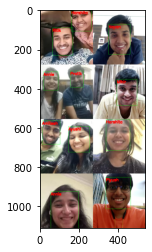

In [37]:
for c in range(len(coord)):
    x,y,w,h = coord[c]
    pr = pred[c]
    img_fin = cv2.rectangle(img_rgb, (x, y), (x+w,y+h), (0, 255, 0), 1)
    
    if pr==0:
        cv2.putText(img_fin, "Nayan", (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2, cv2.LINE_AA) 
    if pr==1:
        cv2.putText(img_fin, "Amitesh", (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2, cv2.LINE_AA)
    if pr==2:
        cv2.putText(img_fin, "Piyush", (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2, cv2.LINE_AA)
    if pr==3:
        cv2.putText(img_fin, "Mihir", (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2, cv2.LINE_AA) 
    if pr==4:
        cv2.putText(img_fin, "Annie", (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2, cv2.LINE_AA)                
    if pr==5:
        cv2.putText(img_fin, "Ayushi", (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2, cv2.LINE_AA)
    if pr==6:
        cv2.putText(img_fin, "Pratik", (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2, cv2.LINE_AA)
    if pr==7:
        cv2.putText(img_fin, "Ritik", (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2, cv2.LINE_AA)
    if pr==8:
        cv2.putText(img_fin, "Harshita", (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2, cv2.LINE_AA)   
        
    cv2.imwrite("final_img.jpg",cv2.cvtColor(img_fin, cv2.COLOR_RGB2BGR))
    
plt.imshow(img_fin)
                    